# Milk Quality Dataset - Machine Learning & AI Analysis

## 1. Exploratory Data Analysis (EDA)
We'll start by analyzing the data to understand relationships between the features, distributions, and patterns that could help with model building.

                pH   Temprature        Taste         Odor         Fat   \
count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000   
mean      6.630123    44.226629     0.546742     0.432483     0.671388   
std       1.399679    10.098364     0.498046     0.495655     0.469930   
min       3.000000    34.000000     0.000000     0.000000     0.000000   
25%       6.500000    38.000000     0.000000     0.000000     0.000000   
50%       6.700000    41.000000     1.000000     0.000000     1.000000   
75%       6.800000    45.000000     1.000000     1.000000     1.000000   
max       9.500000    90.000000     1.000000     1.000000     1.000000   

         Turbidity       Colour  
count  1059.000000  1059.000000  
mean      0.491029   251.840415  
std       0.500156     4.307424  
min       0.000000   240.000000  
25%       0.000000   250.000000  
50%       0.000000   255.000000  
75%       1.000000   255.000000  
max       1.000000   255.000000  


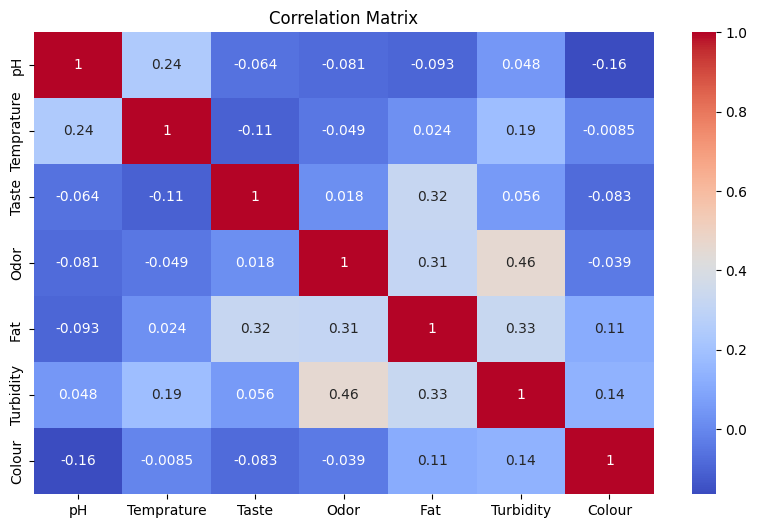

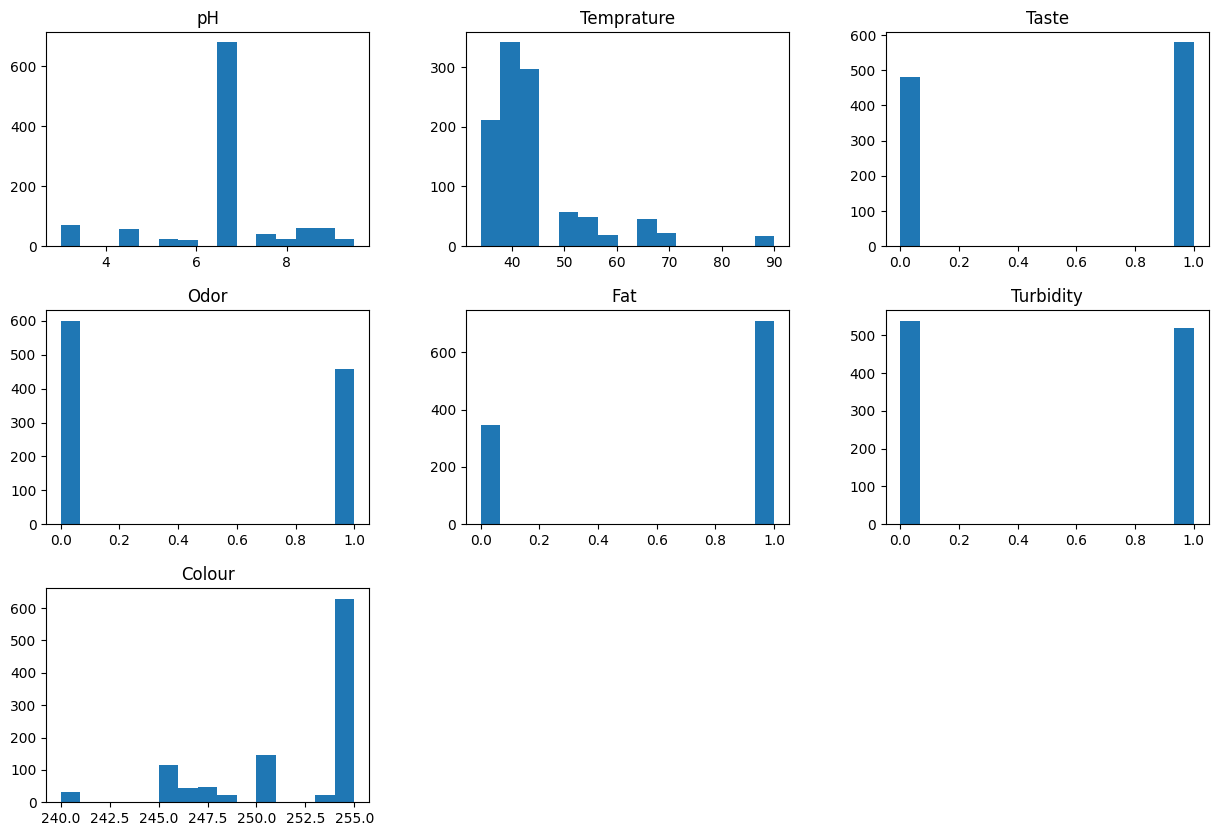

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
milk_data = pd.read_csv("milknew.csv")

# Basic statistics
print(milk_data.describe())

# Drop non-numeric columns
numeric_data = milk_data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix for numeric data only
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distributions of numerical features
numeric_data.hist(bins=15, figsize=(15, 10), grid=False)
plt.show()


## 2. Clustering Analysis
We'll perform clustering using K-Means to group similar milk samples based on their characteristics.

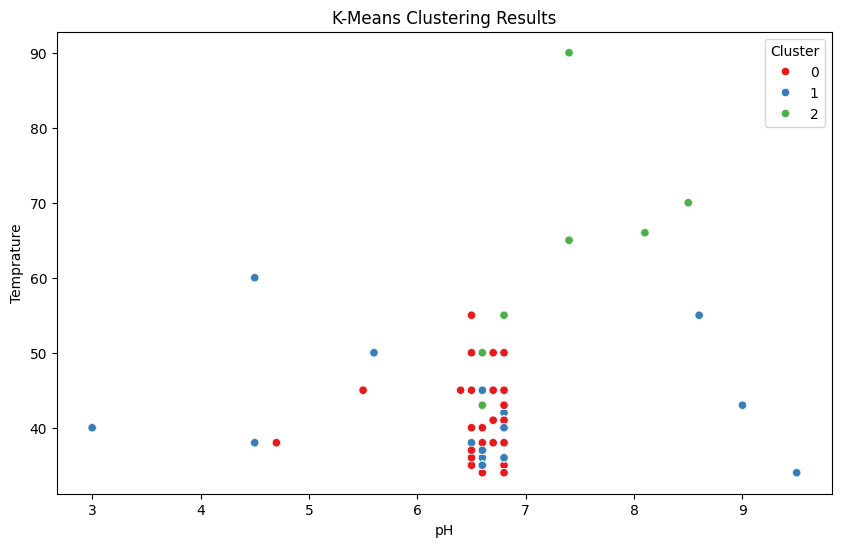

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preprocessing for clustering
features = milk_data.drop(columns=['Grade'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Adding cluster information to the dataset
milk_data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=milk_data['pH'], y=milk_data['Temprature'], hue=milk_data['Cluster'], palette='Set1')
plt.title('K-Means Clustering Results')
plt.show()

## 3. Predicting Milk Grade using Classification Model
We'll build a model to predict the milk grade using classification algorithms. We will use Random Forest Classifier, as it's generally effective for this kind of dataset.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encode the target variable (Grade)
label_encoder = LabelEncoder()
milk_data['Grade'] = label_encoder.fit_transform(milk_data['Grade'])

# Defining features and target
X = milk_data.drop(columns=['Grade', 'Cluster'])
y = milk_data['Grade']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and performance evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        high       0.99      1.00      0.99        76
         low       1.00      0.99      1.00       115
      medium       1.00      1.00      1.00       127

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



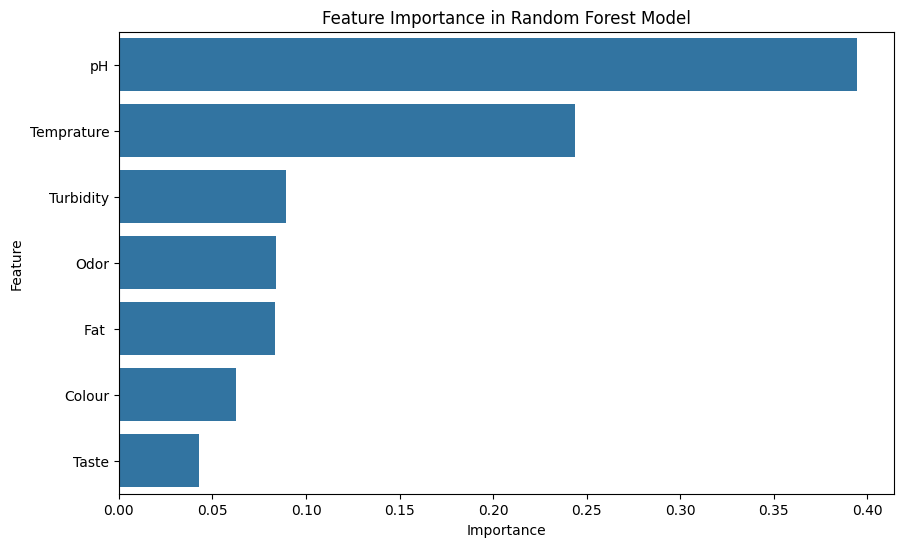

Feature Importance Scores:
       Feature  Importance
0          pH    0.394475
1  Temprature    0.243834
5   Turbidity    0.089201
3        Odor    0.083815
4        Fat     0.083174
6      Colour    0.062845
2       Taste    0.042655


In [4]:
# Feature importance from Random Forest
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()

# Display the feature importance scores
print("Feature Importance Scores:\n", importance_df)


## 4. Advanced Feature Engineering

In [5]:
print(milk_data.columns)


Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade', 'Cluster'],
      dtype='object')


In [6]:
# Strip any leading/trailing spaces in column names
milk_data.columns = milk_data.columns.str.strip()

# Example: pH to Temperature ratio
milk_data['pH_Temp_Ratio'] = milk_data['pH'] / milk_data['Temprature']

# Example: Interaction between Fat and Turbidity
milk_data['Fat_Turbidity'] = milk_data['Fat'] * milk_data['Turbidity']

# Example: Convert continuous pH into categorical feature
milk_data['pH_Category'] = pd.cut(milk_data['pH'], bins=[0, 6.5, 7.5, 14], labels=['Acidic', 'Neutral', 'Alkaline'])

print(milk_data.head())  # Display new features


    pH  Temprature  Taste  Odor  Fat  Turbidity  Colour  Grade  Cluster  \
0  6.6          35      1     0    1          0     254      0        0   
1  6.6          36      0     1    0          1     253      0        1   
2  8.5          70      1     1    1          1     246      1        2   
3  9.5          34      1     1    0          1     255      1        1   
4  6.6          37      0     0    0          0     255      2        0   

   pH_Temp_Ratio  Fat_Turbidity pH_Category  
0       0.188571              0     Neutral  
1       0.183333              0     Neutral  
2       0.121429              1    Alkaline  
3       0.279412              0    Alkaline  
4       0.178378              0     Neutral  


## 5. Dimensionality Reduction

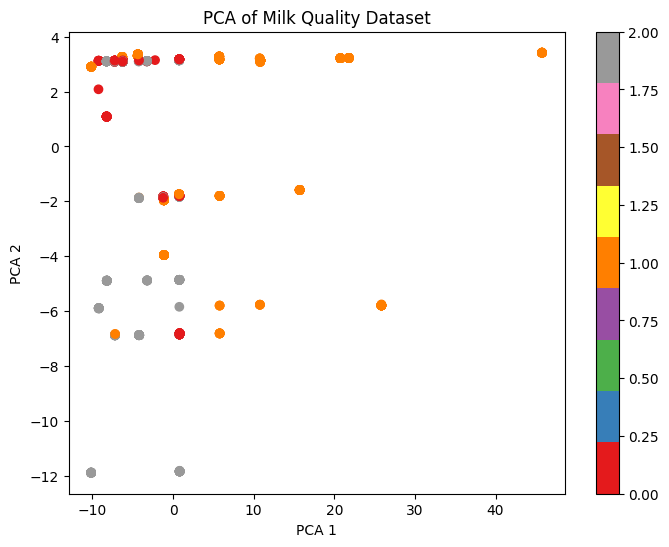

Explained Variance by PCA: [0.82560279 0.15058648]


In [7]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA to reduce dimensionality to 2 components
features = milk_data.drop(columns=['Grade', 'Cluster', 'pH_Category'])  # Exclude categorical
features = pd.get_dummies(features, drop_first=True)  # Convert any categorical variables to dummy

pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

# Plot PCA results
plt.figure(figsize=(8,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=milk_data['Grade'], cmap='Set1')
plt.title('PCA of Milk Quality Dataset')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

# Explained variance
print(f'Explained Variance by PCA: {pca.explained_variance_ratio_}')


## 6. Model Evaluation and Optimization

In [8]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Implement k-fold cross-validation
rf_model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores)}')

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')


Cross-Validation Scores: [0.99056604 1.         1.         1.         0.99052133]
Mean CV Score: 0.9962174729500134
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


## 7. Handling Imbalanced Data

In [9]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Before balancing
print(f'Original distribution: {Counter(y)}')

# SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# After balancing
print(f'Balanced distribution: {Counter(y_smote)}')


Original distribution: Counter({1: 429, 2: 374, 0: 256})
Balanced distribution: Counter({0: 429, 1: 429, 2: 429})


## 8. Regression Analysis

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Predict pH values using regression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_reg = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg)
print(f'Mean Squared Error of Regression Model: {mse}')


Mean Squared Error of Regression Model: 0.3508155162172631


## 9. Anomaly Detection

Outlier
Normal     1021
Anomaly      38
Name: count, dtype: int64


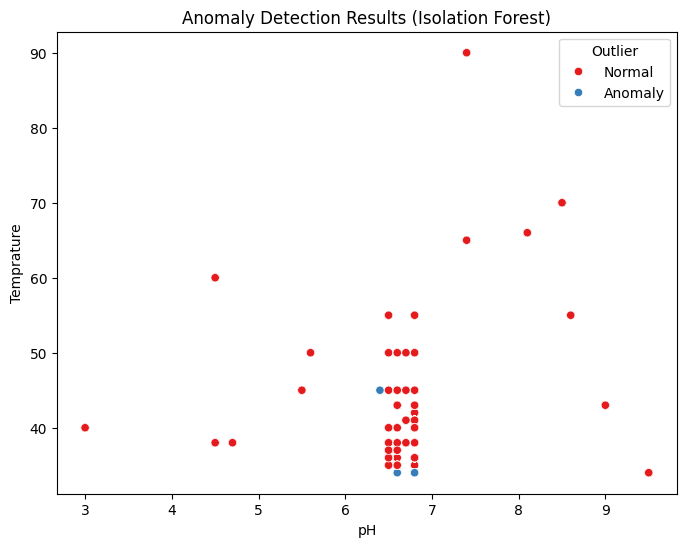

In [11]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X)

# Adding the outliers to the dataset
milk_data['Outlier'] = outliers
milk_data['Outlier'] = milk_data['Outlier'].apply(lambda x: 'Normal' if x == 1 else 'Anomaly')

# Display the number of anomalies
print(milk_data['Outlier'].value_counts())

# Visualize outliers
plt.figure(figsize=(8,6))
sns.scatterplot(x=milk_data['pH'], y=milk_data['Temprature'], hue=milk_data['Outlier'], palette='Set1')
plt.title('Anomaly Detection Results (Isolation Forest)')
plt.show()


## 10. Conclusion

In this extended notebook, we implemented advanced feature engineering, applied dimensionality reduction techniques like PCA, performed model evaluation with cross-validation, tuned hyperparameters using GridSearchCV, handled imbalanced data using SMOTE, carried out regression analysis, and explored anomaly detection. These techniques help in deriving deeper insights and improving model performance for milk quality prediction.

## 11. Predict Milk Grade Based on User Input

In this section, the user can input the values for the milk quality features (such as pH, temperature, taste, odor, etc.) and the model will predict the grade of the milk. It will also display how confident the model is in its prediction.


In [14]:
# Function to take user input for predicting milk grade
def predict_milk_grade(model, label_encoder):
    # Prompt the user for input for each feature
    pH = float(input("Enter the pH level: "))
    temperature = float(input("Enter the temperature: "))
    taste = int(input("Enter the taste (0 = bad, 1 = good): "))
    odor = int(input("Enter the odor (0 = bad, 1 = good): "))
    fat = int(input("Enter the fat presence (0 = absent, 1 = present): "))
    turbidity = int(input("Enter the turbidity (0 = low, 1 = high): "))
    colour = int(input("Enter the color intensity (numeric value): "))

    # Feature Engineering: Create new features
    pH_temp_ratio = pH / temperature
    fat_turbidity = fat * turbidity
    pH_category = pd.cut([pH], bins=[0, 6.5, 7.5, 14], labels=['Acidic', 'Neutral', 'Alkaline'])[0]
    
    # Prepare the data as a DataFrame
    data = pd.DataFrame({
        'pH': [pH],
        'Temprature': [temperature],
        'Taste': [taste],
        'Odor': [odor],
        'Fat': [fat],
        'Turbidity': [turbidity],
        'Colour': [colour],
        'pH_Temp_Ratio': [pH_temp_ratio],
        'Fat_Turbidity': [fat_turbidity]
    })

    # Convert pH_Category to dummy variables
    pH_category_dummies = pd.get_dummies([pH_category], prefix='pH_Category').reindex(columns=['pH_Category_Acidic', 'pH_Category_Neutral', 'pH_Category_Alkaline'], fill_value=0)
    data = pd.concat([data, pH_category_dummies], axis=1)

    # Ensure the columns match the training set
    features_for_model = data.reindex(columns=X.columns, fill_value=0)

    # Make the prediction
    prediction = model.predict(features_for_model)
    prediction_proba = model.predict_proba(features_for_model)

    # Output the result
    predicted_grade = label_encoder.inverse_transform(prediction)[0]
    confidence = prediction_proba.max() * 100

    print(f"\nThe predicted milk grade is: {predicted_grade}")
    print(f"Model confidence: {confidence:.2f}%")

# Call the function for predictions
predict_milk_grade(model, label_encoder)



The predicted milk grade is: high
Model confidence: 47.00%
